# PCA
## Autor: Martín Ordóñez


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
# cargar el conjunto de datos
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
# ver la forma del conjunto de datos
mnist.data.shape

(70000, 784)

In [3]:
X = mnist.data

In [4]:
y = mnist.target

In [5]:
np.unique(y)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [7]:
scaler = StandardScaler()
# Ajustar y transformar los datos 
scaled_df = scaler.fit_transform(X)

In [8]:
pca = PCA()
pcs = pca.fit(scaled_df)

Text(0, 0.5, 'Proportion of Explained Variance')

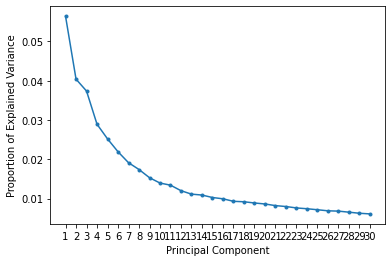

In [13]:
# Graficar la varianza explicada por los 10 primeros componentes
plt.plot(range(1,31), pca.explained_variance_ratio_[:30], marker = '.' )
plt.xticks(ticks = range(1, 31))
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')

In [14]:
# División entrenamiento prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [15]:
# Instanciar Escalador Estándar
scaler = StandardScaler()
# Ajustar y transformar datos
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [20]:
# Ajustar PCA
pca = PCA(n_components = 11)
X_train_pca = pca.fit_transform(X_train_sc)
X_test_pca = pca.transform(X_test_sc)
# ajustar regresión logística
logreg = LogisticRegression()
logreg.fit(X_train_pca, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
print('Training accuracy:', logreg.score(X_train_pca, y_train))
print('Testing accuracy:', logreg.score(X_test_pca, y_test))

Training accuracy: 0.8689714285714286
Testing accuracy: 0.8674857142857143
